# Atividade 2

Aluno: Guilherme Cesar Tomiasi

In [17]:
import os

import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exemplo 1: Noisy Gaussian Data

Apenas adaptando os exemplos apresentados no "Data Driven Science and Engineering"

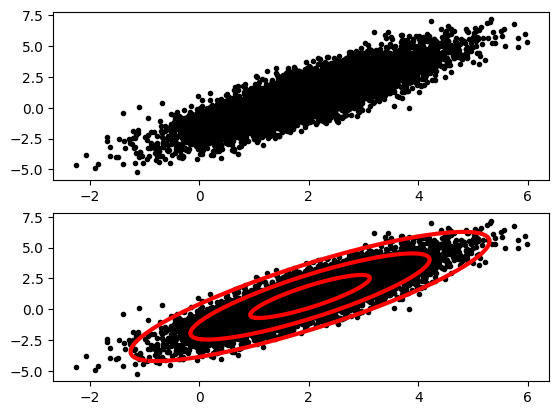

In [2]:
fig, (ax1, ax2) = plt.subplots(2)

# Generate noisy cloud of data
xC = np.array([2, 1])  # Center of data (mean)
sig = np.array([2, 0.5])  # Principal axes
theta = np.pi/3  # Rotate cloud by pi/3
R = np.array([[np.cos(theta), - np.sin(theta)],  # Rotation mat
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000  # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + \
    np.diag(xC) @ np.ones((2, nPoints))
ax1.plot(X[0, :], X[1, :], '.', color='k')  # Plot data
Xavg = np.mean(X, axis=1)  # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T  # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)
theta = 2 * np.pi * np.arange(0, 1, 0.01)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])
ax2.plot(X[0, :], X[1, :], '.', color='k')
ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] +
         Xstd[1, :], '-', color='r', linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0, :], Xavg[1] + 2 *
         Xstd[1, :], '-', color='r', linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0, :], Xavg[1] + 3 *
         Xstd[1, :], '-', color='r', linewidth=3)

# Exemplo 2: Ovarian Cancer Data

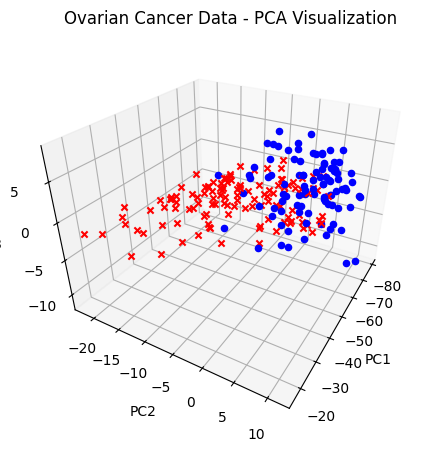

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

obs = np.loadtxt(os.path.join(
    '..', 'resources', 'data', 'ovariancancer_obs.csv'), delimiter=',')
f = open(os.path.join('..', 'resources', 'data', 'ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")
U, S, VT = np.linalg.svd(obs, full_matrices=False)
for j in range(obs.shape[0]):
    x = VT[0, :] @ obs[j, :].T
    y = VT[1, :] @ obs[j, :].T
    z = VT[2, :] @ obs[j, :].T
    if grp[j] == 'Cancer':
        ax.scatter3D(x, y, z, marker='x', color='r')
    else:
        ax.scatter3D(x, y, z, marker='o', color='b')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_proj_type('persp', focal_length=0.25)
ax.view_init(azim=30)
plt.title('Ovarian Cancer Data - PCA Visualization')
plt.show()

Utilizei uma distância focal mais _fish-eye_ para facilitar a visualização das distinções nos dados.

In [8]:
# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")
file_path = os.path.join(path, "breast-cancer.csv")

print("Path to dataset files:", file_path)

Path to dataset files: C:\Users\gtomi\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1\breast-cancer.csv


In [16]:
bcd = pd.read_csv(file_path)
display(bcd)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Dentre todas as colunas, podemos ignorar a primeira que apresenta um índice, utilizar a segunda como a nossa categoria, e o restante como variáveis numéricas.

In [89]:
cats = bcd["diagnosis"]
data = bcd[bcd.columns[2:]].to_numpy()

Tratamos os dados numéricos, removendo a média de cada coluna e normalizando o desvio-padrão em forma unitária.

In [38]:
data_mean = data.mean(axis=0)
data_demeaned = data - data_mean
std_demeaned = data_demeaned.std(axis=0)
data_normalized = data_demeaned / std_demeaned

Verificando se a normalização foi feita corretamente

In [43]:
assert np.allclose(data_normalized.mean(axis=0), 0.0), "Média das colunas não está próxima de zero"
assert np.allclose(data_normalized.std(axis=0), 1.0), "Desvio-padrão das colunas não está próximo de zero"

Nenhum `AssertionError`, logo está tudo de acordo.

Realizando a decomposição SVD e guardando as matrizes obtidas

In [47]:
U, S, Vt = np.linalg.svd(data_normalized, full_matrices=False)

Fazendo a plotagem em 2 dimensões

In [66]:
Vt[:2, :].shape

(2, 30)

In [69]:
data_normalized.T.shape

(30, 569)

In [74]:
res = data_normalized @ Vt[:2, :].T

Text(0.5, 1.0, 'Relação entre componentes principais e categorias de tumor')

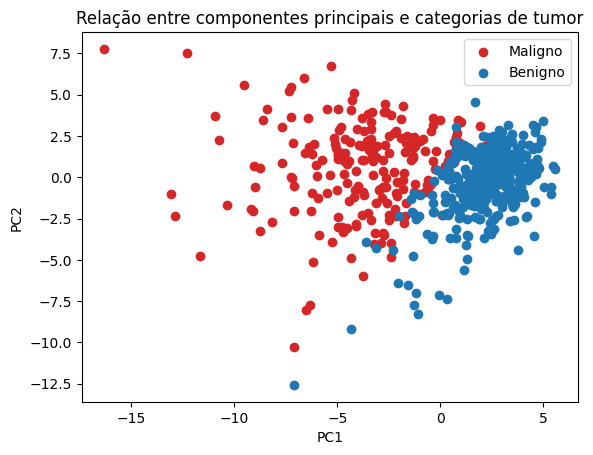

In [95]:
fig, ax = plt.subplots()

m_idx = cats[cats == 'M'].index
b_idx = cats[cats == 'B'].index
ax.scatter(res[m_idx, 0], res[m_idx, 1], color="tab:red", label="Maligno")
ax.scatter(res[b_idx, 0], res[b_idx, 1], color="tab:blue", label="Benigno")
ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Relação entre componentes principais e categorias de tumor")

Text(0, 0.5, 'Soma cumulativa das magnitudes')

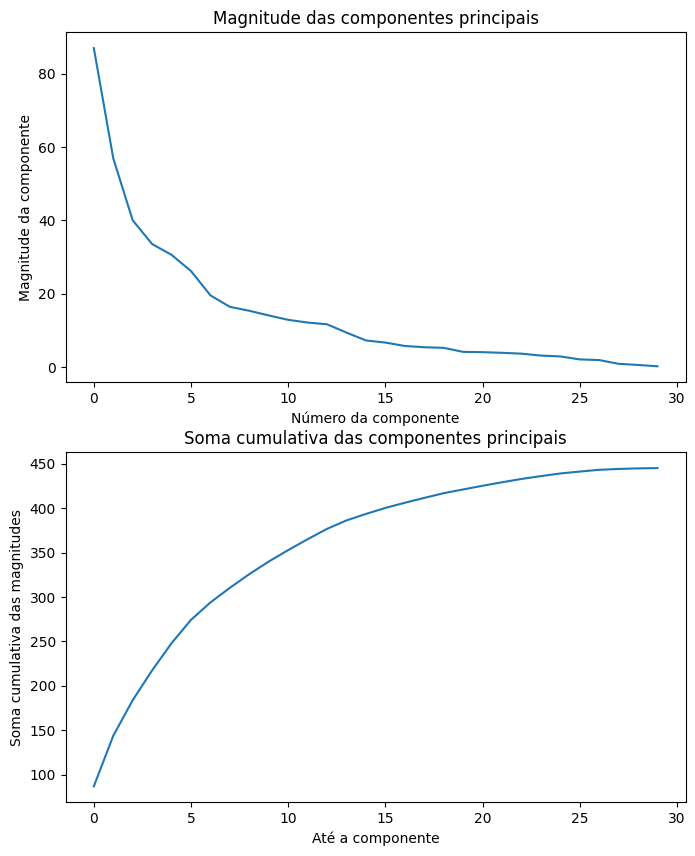

In [85]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,10))

ax1.plot(S)
ax1.set_title("Magnitude das componentes principais")
ax1.set_xlabel("Número da componente")
ax1.set_ylabel("Magnitude da componente")

ax2.plot(np.cumsum(S))
ax2.set_title("Soma cumulativa das componentes principais")
ax2.set_xlabel("Até a componente")
ax2.set_ylabel("Soma cumulativa das magnitudes")